In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

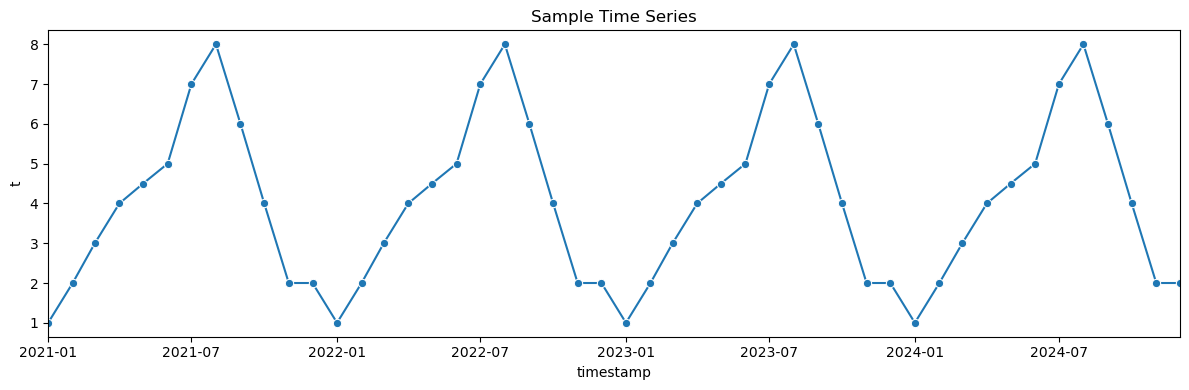

In [15]:
T = 12

sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2]
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

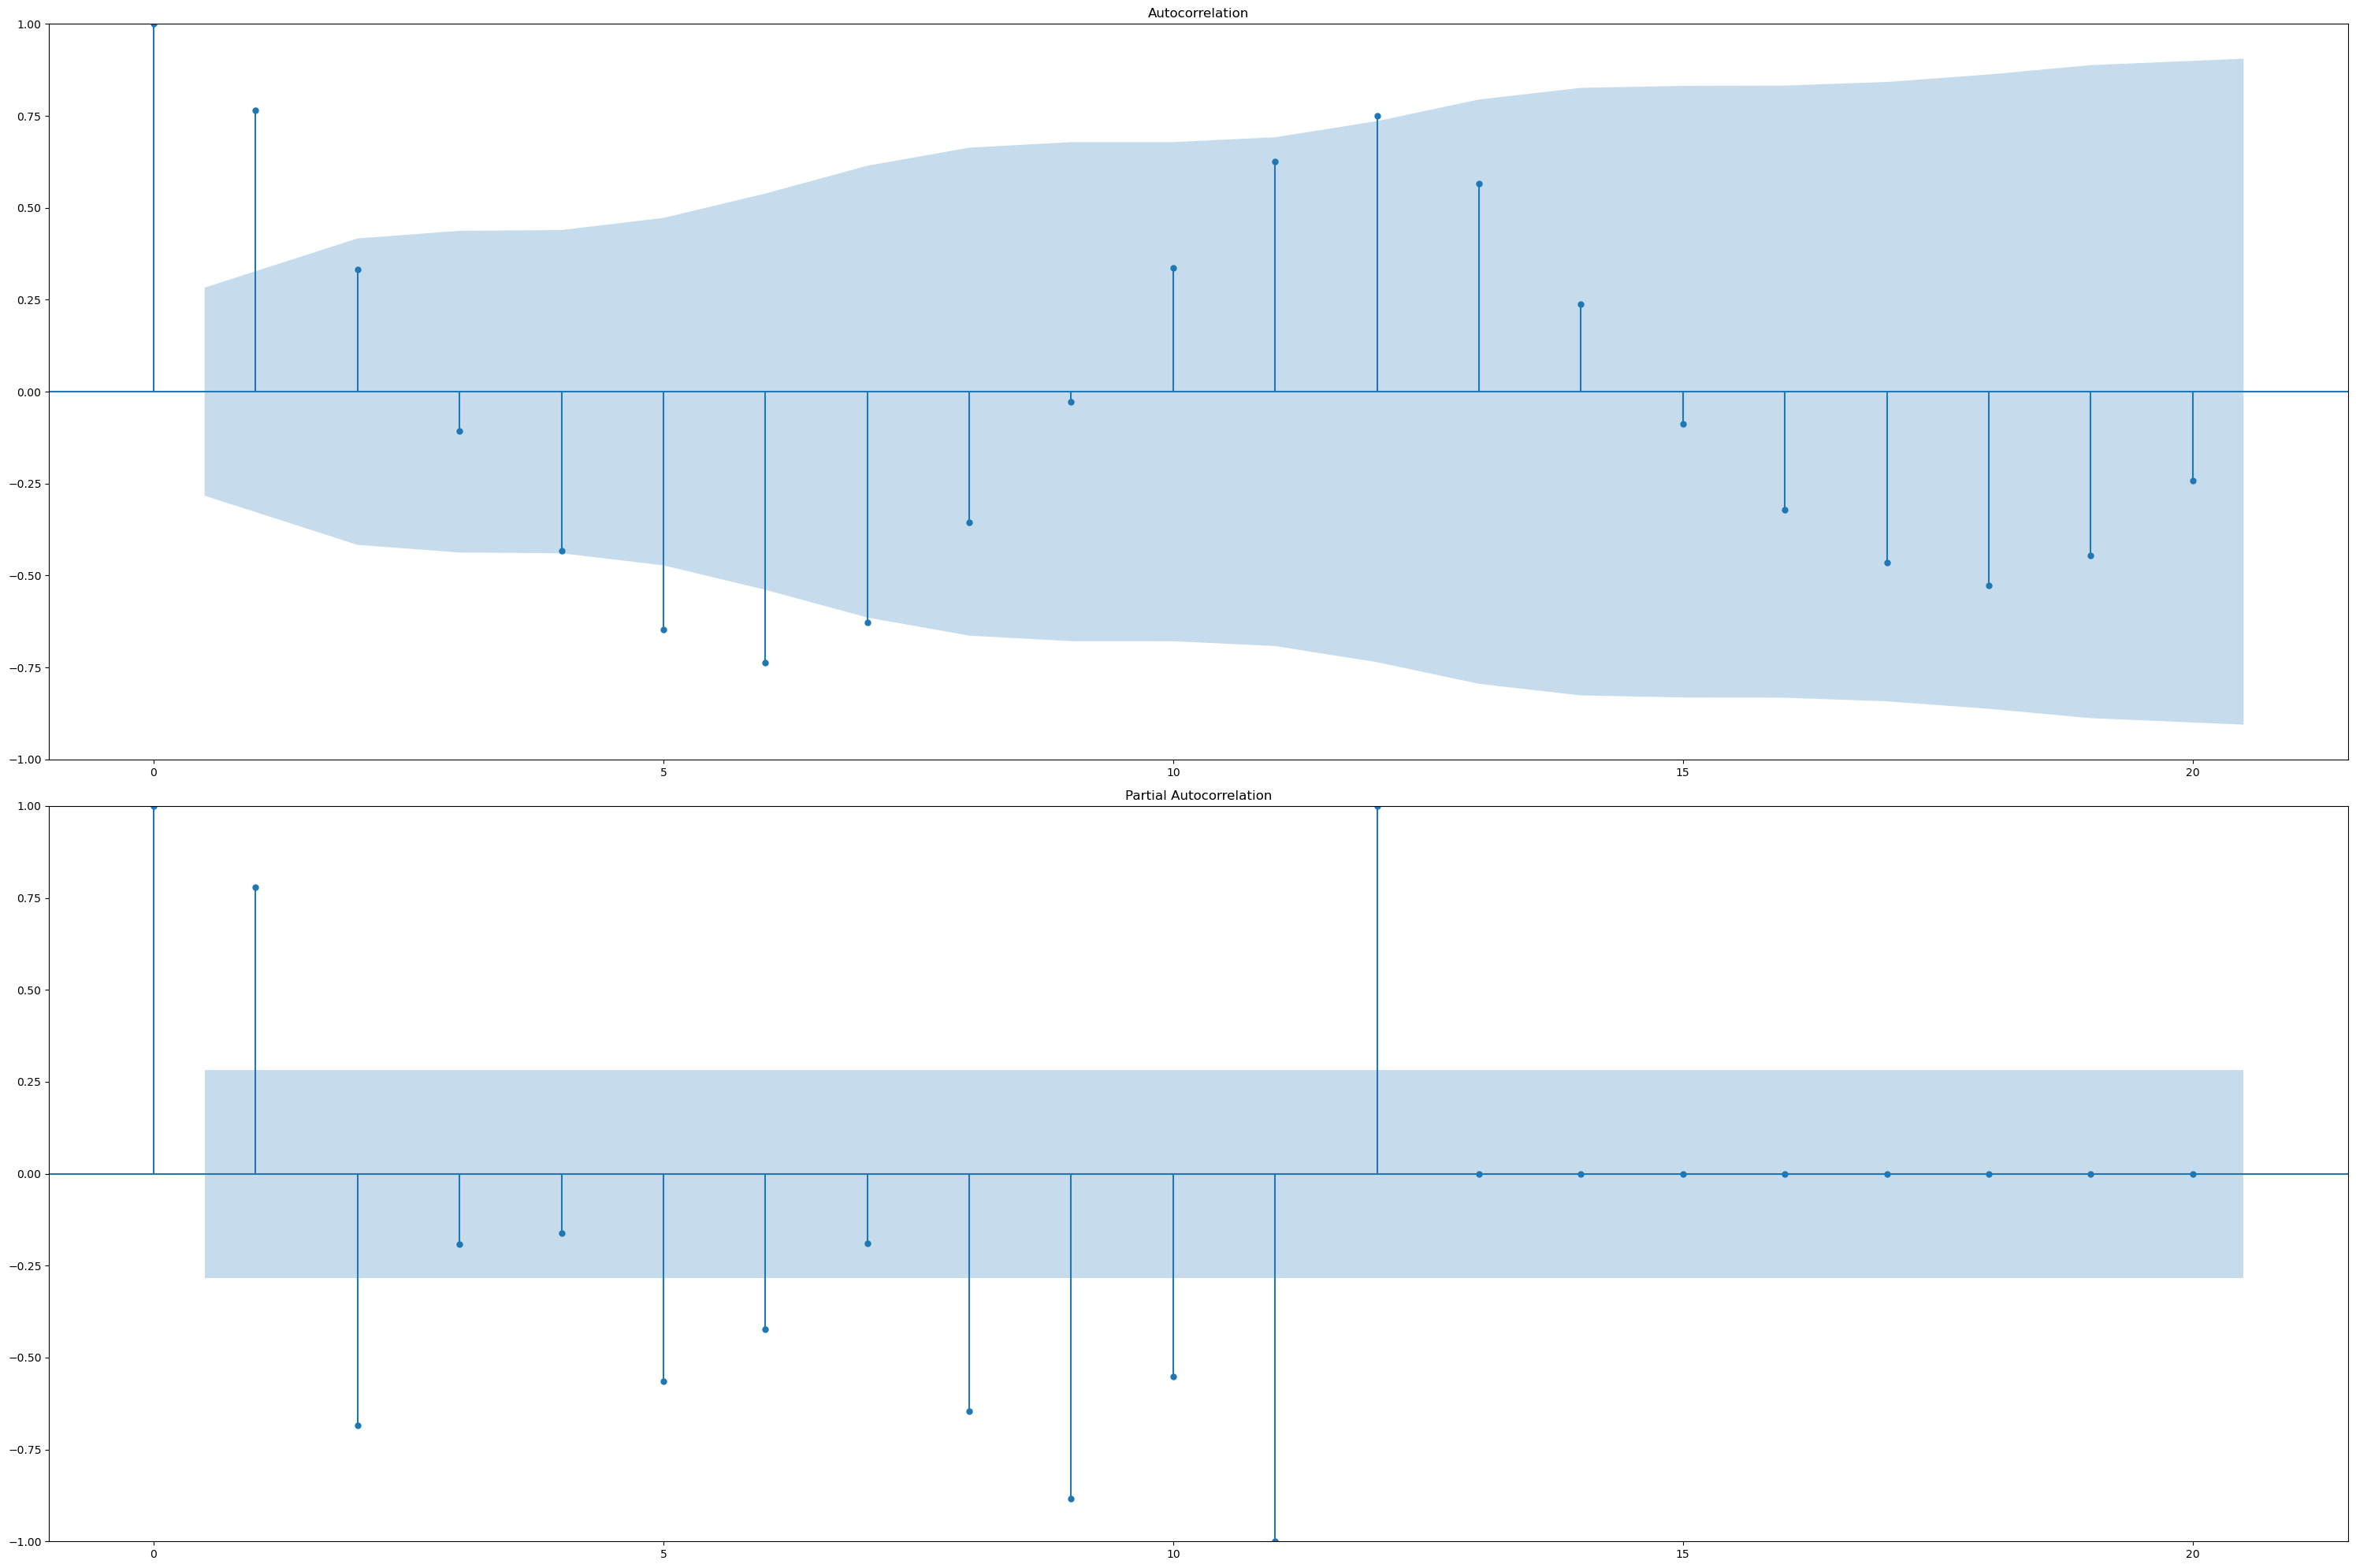

In [16]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
plot_acf(sample['t'],lags=20, ax=ax[0])
plot_pacf(sample['t'],lags=20, ax=ax[1], method='ols')

plt.tight_layout()
plt.show()

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(sample.t, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model = model.fit(disp=False)

print(model.summary())

c:\Users\danli\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                                  t   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                 126.418
Date:                            Thu, 13 Feb 2025   AIC                           -242.836
Time:                                    09:03:43   BIC                           -233.480
Sample:                                         0   HQIC                          -239.300
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8815      0.075     11.777      0.000       0.735       1.028
ma.L1          0.4531      0.071   

c:\Users\danli\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


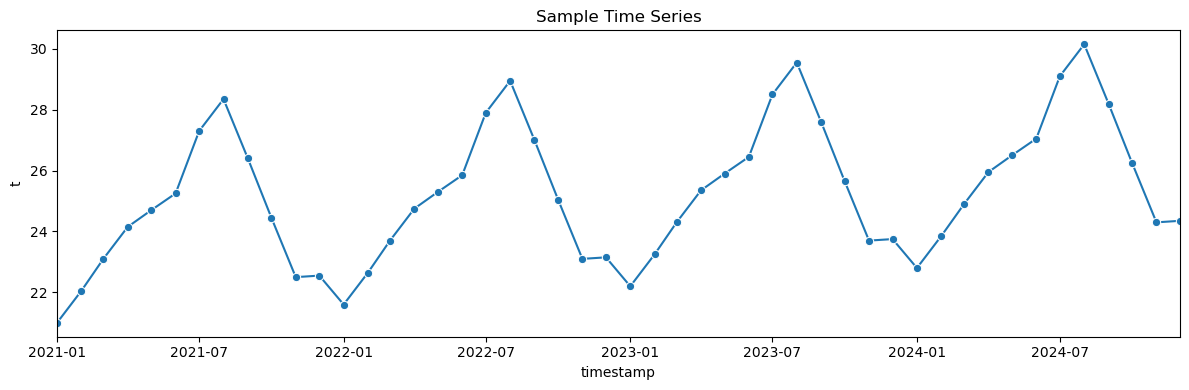

In [18]:
time = np.arange(0, 48)
sample = pd.DataFrame({'timestamp' : pd.date_range('2021-01-01', periods=48, freq='MS'),
                       't' : [1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2, 1, 2, 3, 4, 4.5, 5, 7, 8, 6, 4, 2, 2] + ((0.05*time)+20)
                      })

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))

sns.lineplot(x=sample.timestamp, y=sample['t'], marker='o')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

Issue with stationarity

In [19]:
sample['t_diff'] = sample['t'].diff().fillna(0)

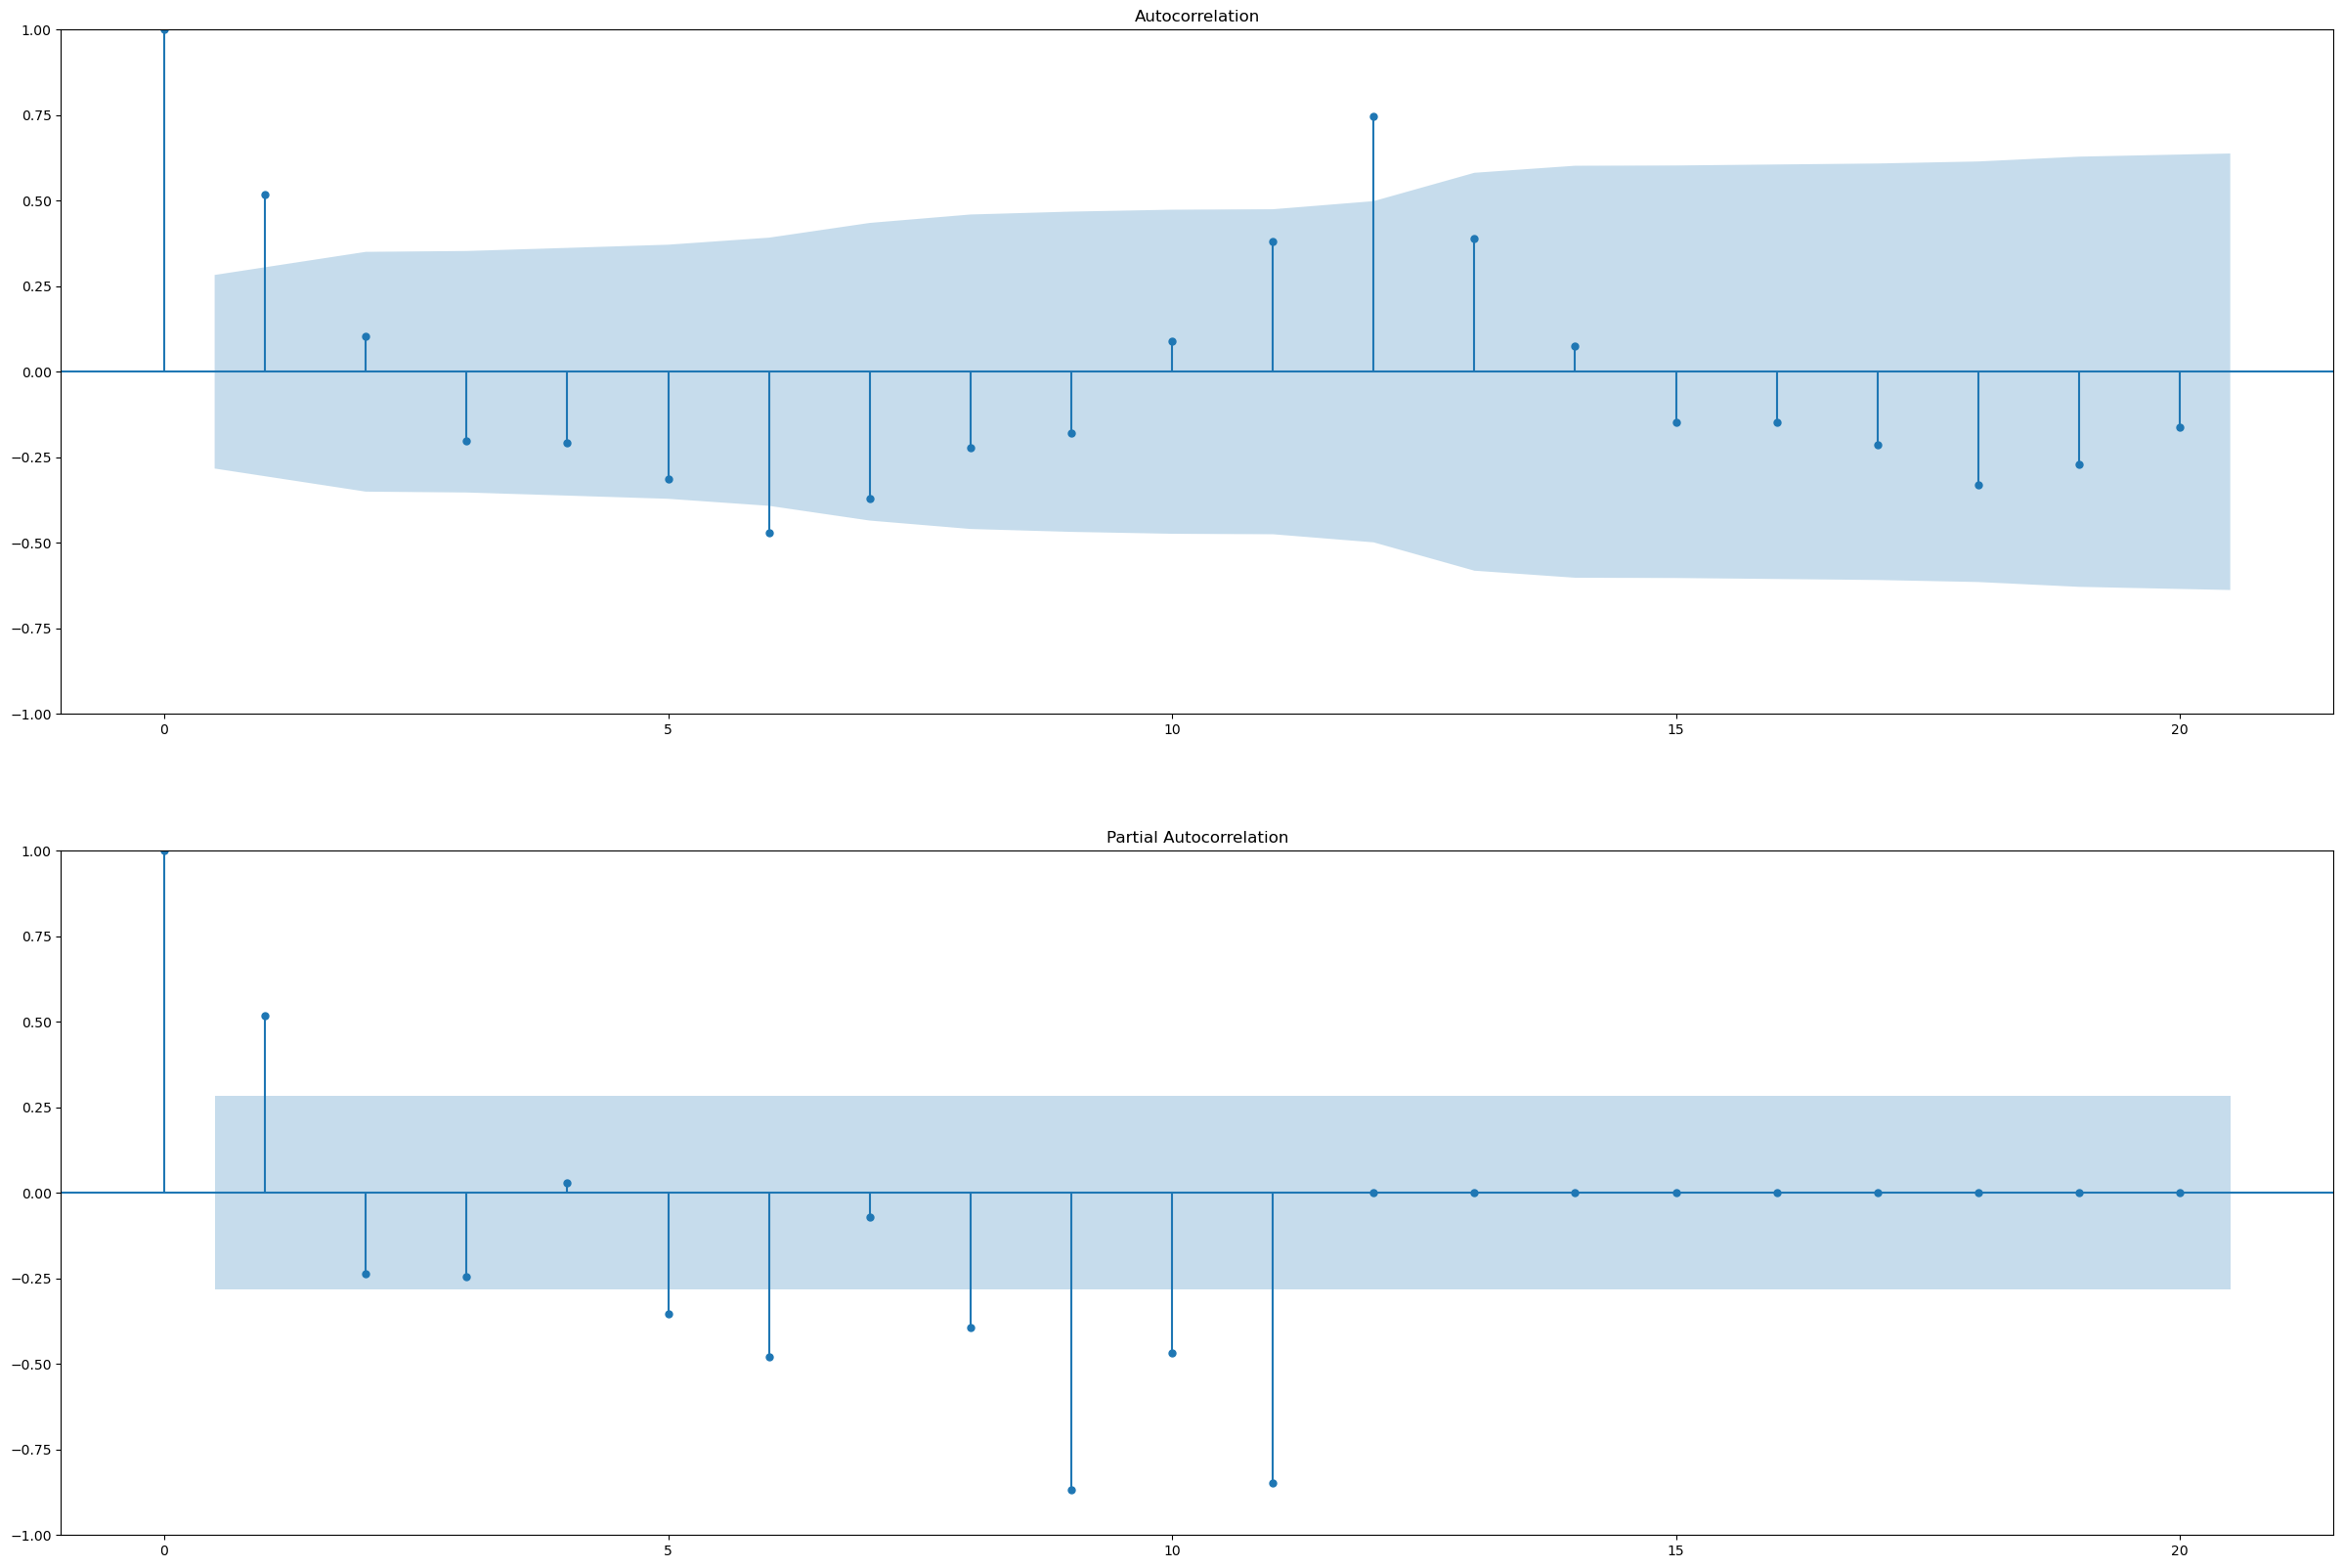

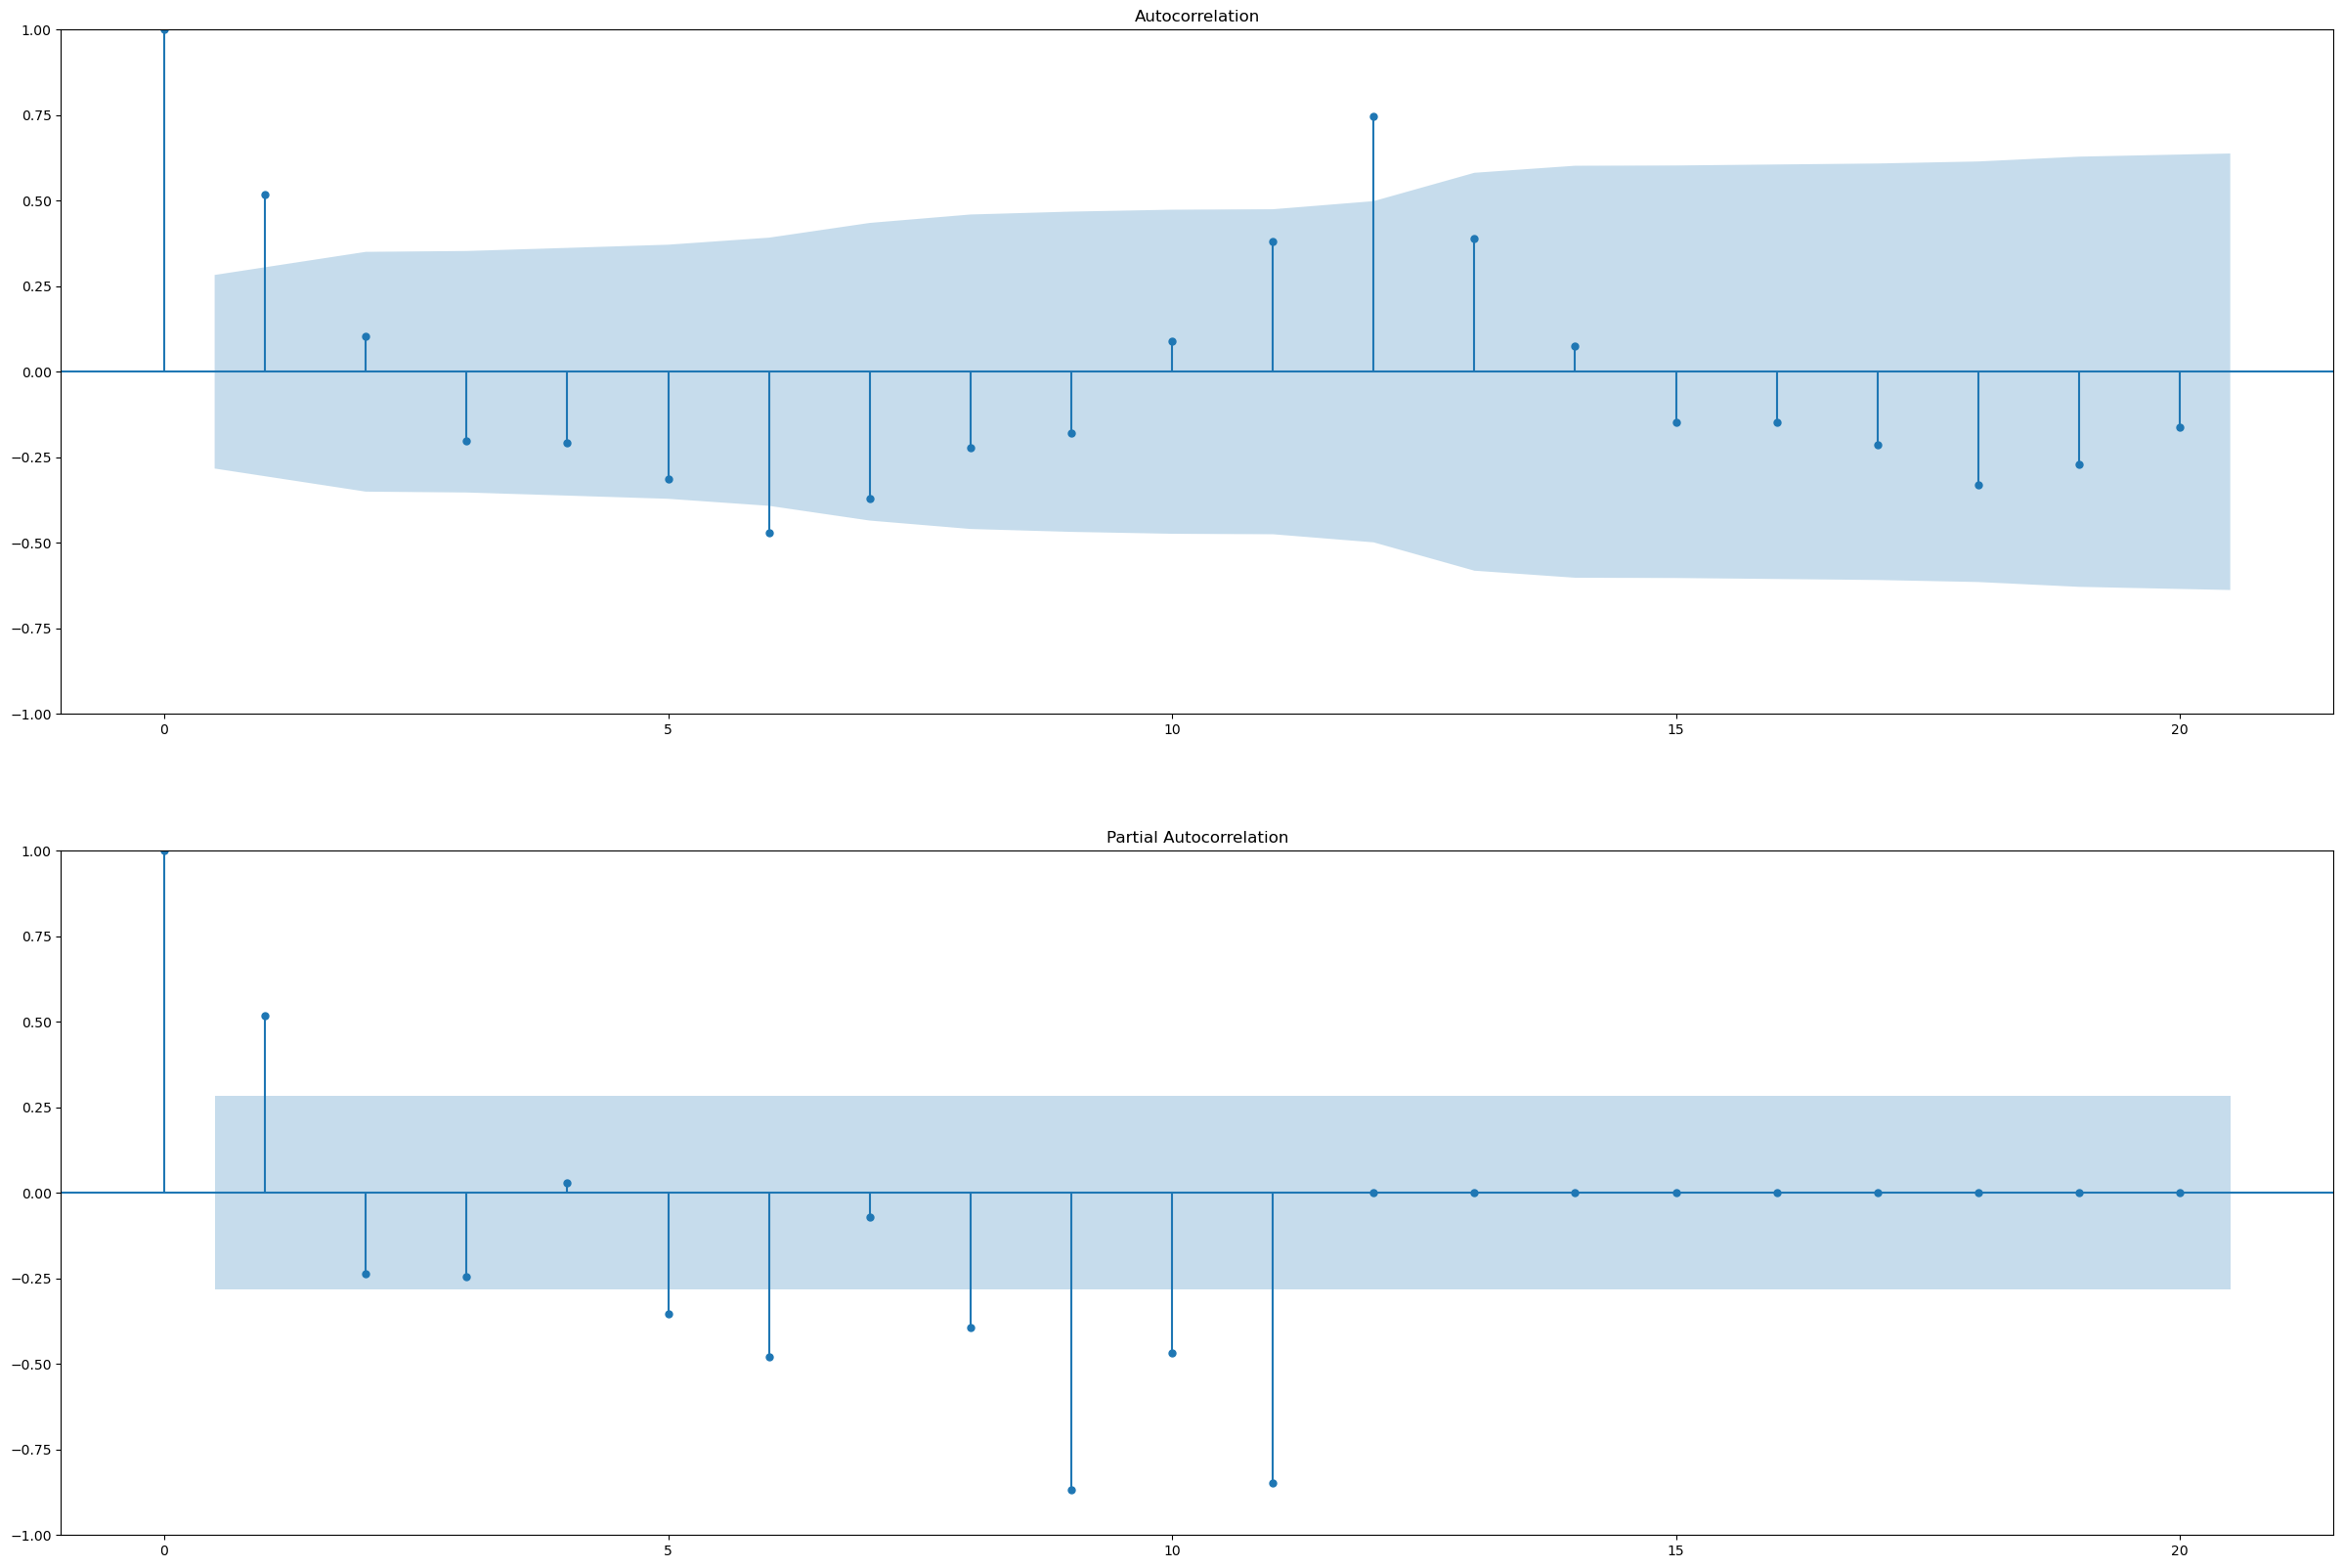

In [20]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(30, 20))
plot_acf(sample['t_diff'],lags=20, ax=ax[0])
plot_pacf(sample['t_diff'],lags=20, ax=ax[1], method='ols')

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(sample.t, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))
model = model.fit(disp=False)

print(model.summary())

c:\Users\danli\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\danli\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                     SARIMAX Results                                      
Dep. Variable:                                  t   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                  98.829
Date:                            Thu, 13 Feb 2025   AIC                           -187.659
Time:                                    09:03:44   BIC                           -178.303
Sample:                                         0   HQIC                          -184.123
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9988      0.001   1483.346      0.000       0.998       1.000
ma.L1          0.4239      0.077   

In [25]:
df = pd.read_csv("Campaign_Finance.csv")
df.sort_values(by=["Date_Filed"], inplace=True)
df.Date_Filed = pd.to_datetime(df.Date_Filed)
df.head()

C:\Users\danli\AppData\Local\Temp\ipykernel_21212\3656696374.py:1: DtypeWarning: Columns (14,15,17,28,30,32,35,36,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Campaign_Finance.csv")


,Transaction_Type,Filer_Name,Transactor_Name,Entity,Transaction_Amount,Date_Filed,Form,Report,Transaction_Code,Transaction_ID,...,Guarantor_City_State_Zip,Amount_Guaranteed,Guarantor_Employer,Guarantor_Occupation,Travel_Outside_Texas,Political_Obligation,Reimbursement_Intended,Returned_to_Filer,Out_Of_State_PAC,Out_of_State_PAC_ID
46927,Expenditure,Austin Apartment Association PAC,Texans For Charles Schwertner,Entity,750.0,2018-01-10,MPAC - Monthly Filing General-Purpose Committ...,R20180110164316,F0001,R20180110164316-F0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46930,Expenditure,Austin Apartment Association PAC,Eddie Rodriguez Campaign,Entity,250.0,2018-01-10,MPAC - Monthly Filing General-Purpose Committ...,R20180110164316,F0004,R20180110164316-F0004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46929,Expenditure,Austin Apartment Association PAC,"Dale, Tony",Individual,500.0,2018-01-10,MPAC - Monthly Filing General-Purpose Committ...,R20180110164316,F0003,R20180110164316-F0003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46928,Expenditure,Austin Apartment Association PAC,John Cyrier Campaign,Entity,500.0,2018-01-10,MPAC - Monthly Filing General-Purpose Committ...,R20180110164316,F0002,R20180110164316-F0002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46926,Contribution,Austin Apartment Association PAC,"Christian, Chad",Individual,150.0,2018-01-10,MPAC - Monthly Filing General-Purpose Committ...,R20180110164316,A0001,R20180110164316-A0001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df = df[df["Entity"]=="Individual"]
df = df[["Transaction_Amount", "Date_Filed"]]
df.head()

,Transaction_Amount,Date_Filed
46929,500.0,2018-01-10
46926,150.0,2018-01-10
67203,350.0,2019-01-10
67204,350.0,2019-01-10
67206,250.0,2019-01-10


In [28]:
df.index = pd.DatetimeIndex(df.Date_Filed).to_period("M")
df_agg = df.groupby(pd.Grouper(freq="M")).agg("Transaction_Amount" : "sum")
df_agg = df_agg.fillna(0)
df_agg.head()


SyntaxError: invalid syntax (679079541.py, line 2)